In [15]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import copy
from scipy.stats import pearsonr
from scipy.stats import spearmanr

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.3

In [16]:
RNA_logFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_log2FC.tsv', sep='\t').drop(columns='gene_name')
RNA_logFC['gene_id'] = RNA_logFC['gene_id'].str.split('.').str[0]

RPF_logFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RPF_log2FC.tsv', sep='\t').drop(columns='gene_name')
RPF_logFC['gene_id'] = RPF_logFC['gene_id'].str.split('.').str[0]

PT_logFC = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20240403/adi_PT_log2FC.tsv', sep='\t')
PT_conv = pd.read_csv(f'{Project}/Results/Tables/Proteome/adi_proteome_logExp_geneid.tsv', sep='\t', usecols=('uniprot_id','gene_id'))
PT_logFC = pd.merge(PT_conv, PT_logFC, on='uniprot_id').drop(columns='uniprot_id')

logFC = pd.merge(RNA_logFC, RPF_logFC, on='gene_id')
logFC = pd.merge(logFC, PT_logFC, on='gene_id')

display(logFC)

,gene_id,R4a,R4b,R4c,R8a,R8b,R8c,P4a,P4b,P4c,P8a,P8b,P8c,PT4a,PT4b,PT4c,PT8a,PT8b,PT8c
0,ENSMUSG00000033845,2.328807,1.240543,2.190597,2.424463,2.546298,2.222109,1.657804,1.171514,1.997305,2.082672,2.105181,1.858454,1.184846,0.621893,1.141637,1.027750,1.049786,0.911146
1,ENSMUSG00000025903,0.906135,0.151299,0.634721,1.300843,0.700849,0.680691,0.711222,0.614390,0.798206,0.835895,0.862427,0.345544,0.362965,0.192166,0.237856,0.711028,0.791022,0.580828
2,ENSMUSG00000033813,-0.778152,-0.891990,-0.800634,0.544081,0.069101,0.018377,-0.786339,-0.490742,-0.738630,0.712161,0.234588,0.254382,-0.551997,-0.192470,-0.450520,-0.441961,-0.456226,-0.535802
3,ENSMUSG00000033793,0.316783,0.135992,0.123435,0.129438,-0.144958,-0.115774,0.380426,0.483282,0.522130,0.213479,0.218132,0.288738,0.669102,0.488850,0.553021,0.822928,0.814641,0.700139
4,ENSMUSG00000025907,-0.126617,-0.380597,0.116884,0.210682,0.724214,0.049875,0.039091,-0.038088,-0.124932,-0.024301,0.100487,-0.069660,-0.289022,-0.181792,-0.320579,0.006808,-0.010444,-0.130666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,ENSMUSG00000064354,4.461964,2.063368,2.632909,6.129869,2.134635,1.628304,0.670201,0.380120,0.682348,1.468214,1.980657,1.266738,0.921200,0.338995,0.722313,0.886786,0.904438,0.718910
4755,ENSMUSG00000064356,3.325070,4.641869,5.823179,4.083057,2.851613,2.412215,1.352823,0.851509,1.522738,0.945549,0.574701,0.832563,1.392260,0.687299,1.375454,1.606070,1.616566,1.424375
4756,ENSMUSG00000064363,2.152629,1.141832,1.738168,2.585853,2.088923,1.974449,0.312344,0.959571,0.692101,0.821662,1.176212,0.699861,1.176699,0.481403,1.085957,1.169379,1.389643,1.201686
4757,ENSMUSG00000064367,1.174141,0.893794,1.794937,1.746084,1.779085,1.404661,0.544284,1.092034,0.970458,0.919780,1.408120,0.893956,0.956527,0.701368,0.813769,1.245336,1.252062,1.053521


In [17]:
order = [LIB+day+rep for day in ['4','8'] for LIB in ['R','P','PT'] for rep in ['a','b','c']]

corr = {A:[1 if A==B else pearsonr(logFC[A], logFC[B])[0] for B in order] for A in order} # Pearson r
corr = pd.DataFrame(corr, index=order)

display(corr)

,R4a,R4b,R4c,P4a,P4b,P4c,PT4a,PT4b,PT4c,R8a,R8b,R8c,P8a,P8b,P8c,PT8a,PT8b,PT8c
R4a,1.000000,0.933532,0.984484,0.954057,0.902126,0.950844,0.785659,0.727439,0.792241,0.941780,0.941818,0.952151,0.908845,0.903200,0.905986,0.768499,0.755896,0.774618
R4b,0.933532,1.000000,0.947012,0.903125,0.945568,0.905397,0.737072,0.749843,0.753360,0.856962,0.863763,0.876498,0.816749,0.814861,0.827939,0.691602,0.681590,0.709754
R4c,0.984484,0.947012,1.000000,0.957430,0.919908,0.961206,0.789984,0.739065,0.801130,0.922473,0.920222,0.943848,0.898576,0.895270,0.903798,0.765933,0.753750,0.775986
P4a,0.954057,0.903125,0.957430,1.000000,0.932358,0.981892,0.815262,0.758586,0.819933,0.901107,0.887243,0.905028,0.935173,0.928084,0.935523,0.800611,0.788516,0.805132
P4b,0.902126,0.945568,0.919908,0.932358,1.000000,0.940666,0.793173,0.809524,0.806469,0.820956,0.811719,0.832951,0.832097,0.842707,0.847442,0.734423,0.727084,0.754170
P4c,0.950844,0.905397,0.961206,0.981892,0.940666,1.000000,0.821013,0.768868,0.829540,0.886135,0.877082,0.897479,0.914366,0.913270,0.932454,0.792994,0.782646,0.803124
PT4a,0.785659,0.737072,0.789984,0.815262,0.793173,0.821013,1.000000,0.888259,0.980416,0.715821,0.708814,0.717602,0.752439,0.751532,0.746940,0.910011,0.904078,0.918453
PT4b,0.727439,0.749843,0.739065,0.758586,0.809524,0.768868,0.888259,1.000000,0.893555,0.658552,0.655429,0.664350,0.688199,0.697261,0.691697,0.822399,0.840443,0.834351
PT4c,0.792241,0.753360,0.801130,0.819933,0.806469,0.829540,0.980416,0.893555,1.000000,0.722224,0.715659,0.728400,0.753654,0.753652,0.753815,0.906443,0.903588,0.929347
R8a,0.941780,0.856962,0.922473,0.901107,0.820956,0.886135,0.715821,0.658552,0.722224,1.000000,0.977638,0.978943,0.956055,0.947341,0.941038,0.765306,0.752814,0.760377


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_18951/3427726545.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  using_cm = copy.copy(cm.get_cmap("Reds")) # Reds plasma


<Figure size 640x480 with 0 Axes>

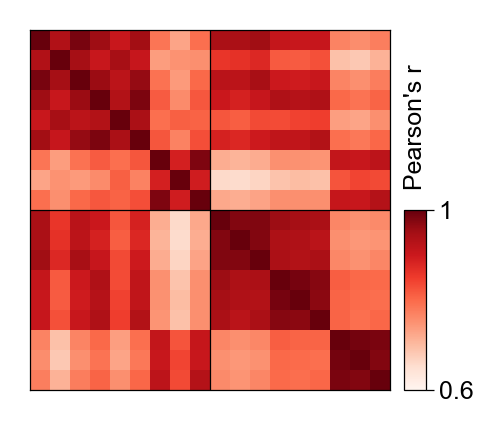

In [24]:
using_cm = copy.copy(cm.get_cmap("Reds")) # Reds plasma
using_cm.set_bad('gray',1.)


fig = plt.figure(figsize=(1.2, 1.2), dpi=300)
ax1 = plt.axes([0, 0, 1, 1])

heat1 = ax1.imshow(corr, cmap=using_cm, 
                   interpolation='none', aspect='auto', rasterized=True, 
                   vmin=0.6, vmax=1)
ax1.axvline(8.5, c='k', lw=0.3)
ax1.axhline(8.5, c='k', lw=0.3)

ax1.set_xticks([])
ax1.set_yticks([])
# labels = [w.replace('_', ' ') for w in order]
# ax1.set_xticks(range(len(corr)))
# ax1.set_xticklabels(labels, rotation=90)
# ax1.set_yticks(range(len(corr)))
# ax1.set_yticklabels(labels)
# ax1.tick_params(length=0)


cbar_size = [1.04, 0, 0.06, 0.5]
cbar = plt.colorbar(heat1, cax = fig.add_axes(cbar_size))#, orientation='horizontal')
cbar.ax.set_title("Pearson's r", fontsize=6, rotation=90)
cbar.set_ticks([0.6,1])
cbar.set_ticklabels([0.6,1])
cbar.ax.tick_params(labelsize=6, width=0.3, length=2, pad=1)


plt.savefig('logFC_correlation_heatmap.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [19]:
# down_up_merge = pd.DataFrame(columns=['gene_id'])
# down_up = ['RNA_C6&7&8&9','RPF_C1&2','PT_C1&7']
# for C in down_up:
#     down_up_merge = pd.merge(down_up_merge, gene_lists[C], on='gene_id', how='outer')

# up_down_merge = pd.DataFrame(columns=['gene_id'])
# up_down = ['RNA_C1&2&10','RPF_C8','PT_C3&5']
# for C in up_down:
#     up_down_merge = pd.merge(up_down_merge, gene_lists[C], on='gene_id', how='outer')

# down_up_merge.to_csv('down_up_genes.txt', index=False, header=False)
# up_down_merge.to_csv('up_down_genes.txt', index=False, header=False)